<a href="https://colab.research.google.com/github/yuvalBerghaus/computer_vision/blob/main/ex_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[206, 110, 120]


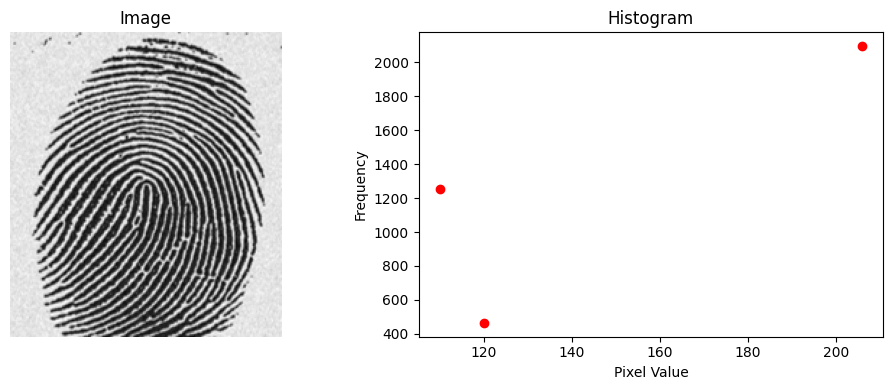

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

the following threshold is  50


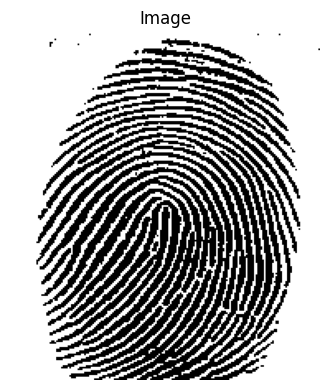

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

the following threshold is  127


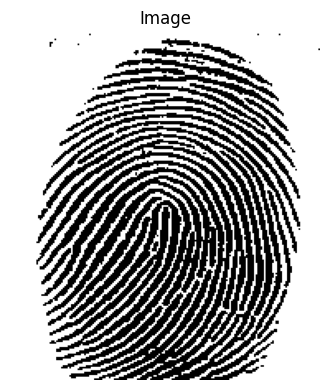

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

the following threshold is  190


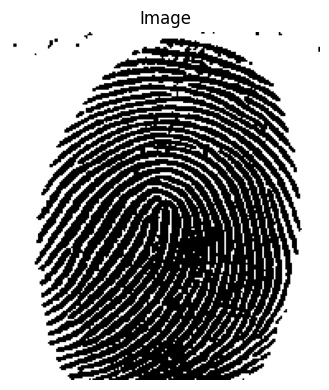

In [7]:
import cv2
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy.signal import find_peaks
from google.colab import files
from matplotlib import pyplot as plt


flag_original = True
three_peaks_for_next = None
def otsu_threshold(image, init_t):
    img = cv2.imread(image, 0)
    # flatten the image values
    img_f = sum(np.array(img).tolist(), [])
    # initialize a 256-size count-array to zeros
    prs = list(np.zeros(256).astype(int))
    # counting the occurrences of each value
    for pixel in img_f:
        prs[pixel] += 1
    # initialize "minimum sigma" to huge number
    min_sig = 10**10
    # initialize optimal t to 0
    optimal = 0
    for t in range(init_t, 220):
        # q1 = sum of p(i) if i<=t
        q1 = sum(prs[:t+1])
        # q2 = sum of p(i) if i>t
        q2 = sum(prs[t+1:])
        # mu1 = sum of i*p(i) / q1 if i<=t
        mu1 = sum([(i*pr)/q1 for i, pr in enumerate(prs[:t+1])])
        # mu2 = sum of i*p(i) / q2 if i>t
        mu2 = sum([(i*pr)/q2 for i, pr in enumerate(prs[t+1:])])
        # s1 = [(i - mu1)^2] * (pr/q1) if i<=t
        s1 = sum([((i - mu1)**2) * (pr/q1) for i, pr in enumerate(prs[:t+1])])
        # s2 = [(i - mu2)^2] * (pr/q2) if i<=t
        s2 = sum([((i - mu2)**2) * (pr/q2) for i, pr in enumerate(prs[t+1:])])
        sigma = q1*s1 + q2*s2
        if sigma < min_sig:
            min_sig = sigma
            optimal = t
    return optimal




def otsu_segmentation(image, threshold):
    img = cv2.imread(image, 0)
    new_img = np.zeros(img.shape).astype(int)
    for i, row in enumerate(img):
        for j, pixel in enumerate(row):
            if pixel < threshold:
                new_img[i][j] = 0
            else:
                new_img[i][j] = 255
    if 'png' in image:
        name = image.replace('.png', '_threshold'+str(threshold)+'.png')

    elif 'jpg' in image:
        name = image.replace('.jpg', '_threshold'+str(threshold)+'.jpg')
    elif 'jpeg' in image:
        name = image.replace('.jpeg', '_threshold'+str(threshold)+'.jpeg')
    else:
        return
    cv2.imwrite(name, new_img)
    files.download(name)  # Download the segmented image

def plot_original_with_histogram(image):
    fig, ax = plt.subplots(figsize=(10, 4))

def plot_image_histogram(image):
    global flag_original
    global three_peaks_for_next
    img = cv2.imread(image, 0)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Image')
    plt.axis('off')
    if flag_original is True:
      plt.subplot(1, 2, 2)
      plt.title('Histogram')
      plt.xlabel('Pixel Value')
      plt.ylabel('Frequency')
      peaks, _ = find_peaks(hist.flatten(), height=(None, None), distance=10, prominence=1)
      peaks_sorted = sorted(peaks, key=lambda x: hist[x], reverse=True)
      peaks_sorted = peaks_sorted[:3]  # Get only the three highest peaks
      three_peaks_for_next = peaks_sorted.copy()
      print(three_peaks_for_next)
      flag_original = False
      plt.plot(peaks_sorted, hist[peaks_sorted], 'ro')  # Mark the peaks on the histogram

    plt.tight_layout()
    plt.show()



def inpaint(image, mask):
    img = cv2.imread(image)
    mask = 255 - cv2.imread(mask, 0)
    telea = cv2.inpaint(img, mask, 10, cv2.INPAINT_TELEA)
    ns = cv2.inpaint(img, mask, 10, cv2.INPAINT_NS)
    cv2.imwrite('telea.png', telea)
    cv2.imwrite('ns.png', ns)


image_path = 'fingerprint.png'
  # Otsu's algorithm implementation with 3 initial t
plot_image_histogram(image_path)
for t in (50, 127, 190):
    threshold = otsu_threshold(image_path, t)
    otsu_segmentation(image_path, threshold)
    print("the following threshold is ",t)
    plot_image_histogram('fingerprint_threshold{}.png'.format(threshold))


# **If you select a value of `t` smaller than the optimal threshold, the Otsu algorithm will return the optimal threshold by finding the minimum value of `t`. However, if you choose a larger `t`, the algorithm will simply return that value of `t` itself.**

The 3 peaks are -  [206, 110, 120]
the following threshold is  206


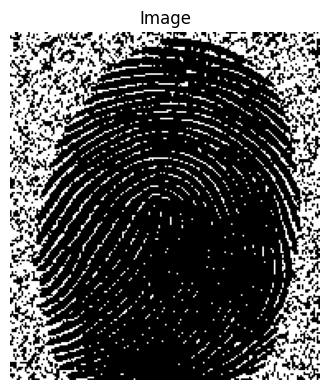

the following threshold is  110


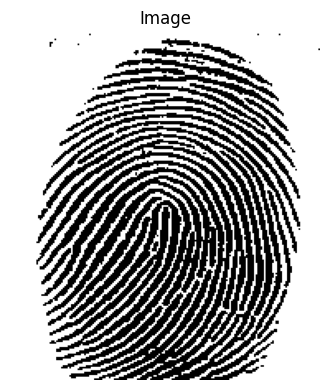

the following threshold is  120


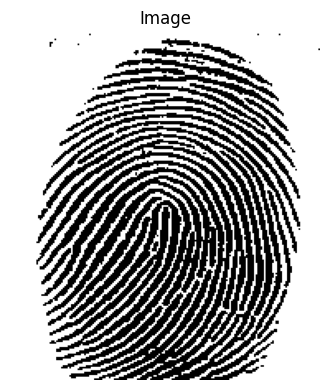

In [5]:
print("The 3 peaks are - ", three_peaks_for_next)
for t in (three_peaks_for_next):
    threshold = otsu_threshold(image_path, t)
    otsu_segmentation(image_path, threshold)
    print("the following threshold is ",t)
    plot_image_histogram('fingerprint_threshold{}.png'.format(threshold))

#Image Inpainting


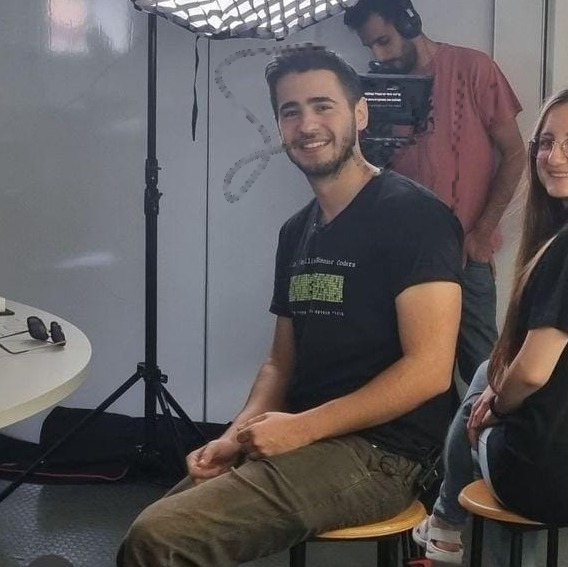

True

In [11]:

img = cv2.imread('input.png')
mask = cv2.imread('mask.png',0)
mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
dst = cv2.inpaint(img,mask,3,cv2.INPAINT_NS)
cv2_imshow(dst)
cv2.imwrite('NS.png',dst)


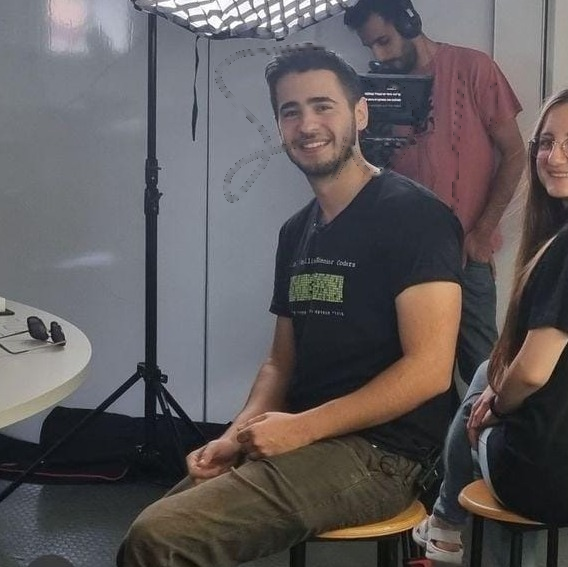

True

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
#Using TELEA algorithem , using my japanese name
img = cv2.imread('input.png')
mask = cv2.imread('mask.png',0)
mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
dst = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
cv2_imshow(dst)
cv2.imwrite('TELEA.png',dst)